# Part 1: Data Preprocessing

## We are importing Libraries

In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 326.8 kB/s eta 0:06:23
   ---------------------------------------- 0.1/124.9 MB 722.1 kB/s eta 0:02:53
   ---------------------------------------- 0.2/124.9 MB 958.4 kB/s eta 0:02:11
   ---------------------------------------- 0.3/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.4/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 0.6/124.9 MB 1.8 MB/s eta 0:01:09
   ---------------------------------------- 0.8/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.9/124.9 MB 2.2 MB/s eta 0:00:58
   ---------------------------------------- 1.1/124.9 MB 2.3 MB/s eta 0:00:55

In [13]:
from xgboost import XGBRFRegressor


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings('ignore')


## We are loading the dataset

In [17]:
dataset = pd.read_csv('C:\\Users\\USER\\Desktop\\projects\\insurance.csv')

## We are exploring the dataset 

In [21]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [23]:
dataset.shape

(1338, 7)

In [25]:
dataset.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

## We are distinguishing the categorical and numerical data

In [28]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [30]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [32]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

## Statisical Summary

In [35]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## We are grouping the dataset by 'sex', 'smoker', 'region'





In [38]:
dataset.groupby('sex').mean(numeric_only=True)


,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.917160,30.945266,1.115385,13956.751420


In [40]:
dataset.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,expenses
smoker,,,,
no,39.385338,30.653195,1.090226,8434.268449
yes,38.514599,30.713139,1.113139,32050.231971


In [42]:
dataset.groupby('region').mean(numeric_only=True)

,age,bmi,children,expenses
region,,,,
northeast,39.268519,29.176235,1.046296,13406.384691
northwest,39.196923,29.201846,1.147692,12417.575169
southeast,38.939560,33.359341,1.049451,14735.411538
southwest,39.455385,30.596615,1.141538,12346.937908


## We are looking for the missing values

In [45]:
dataset.isnull().values.any()

False

In [47]:
dataset.isnull().values.sum()

0

## We are formatting the Categorical Data

In [50]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [52]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [54]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [56]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [58]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### Processing the categorical values

In [61]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [63]:
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


In [65]:
dataset.shape

(1338, 9)

## Correlation Matrix

In [68]:
dataset_2 = dataset.drop(columns='expenses')

<Axes: title={'center': 'Correlation with Expenses'}>

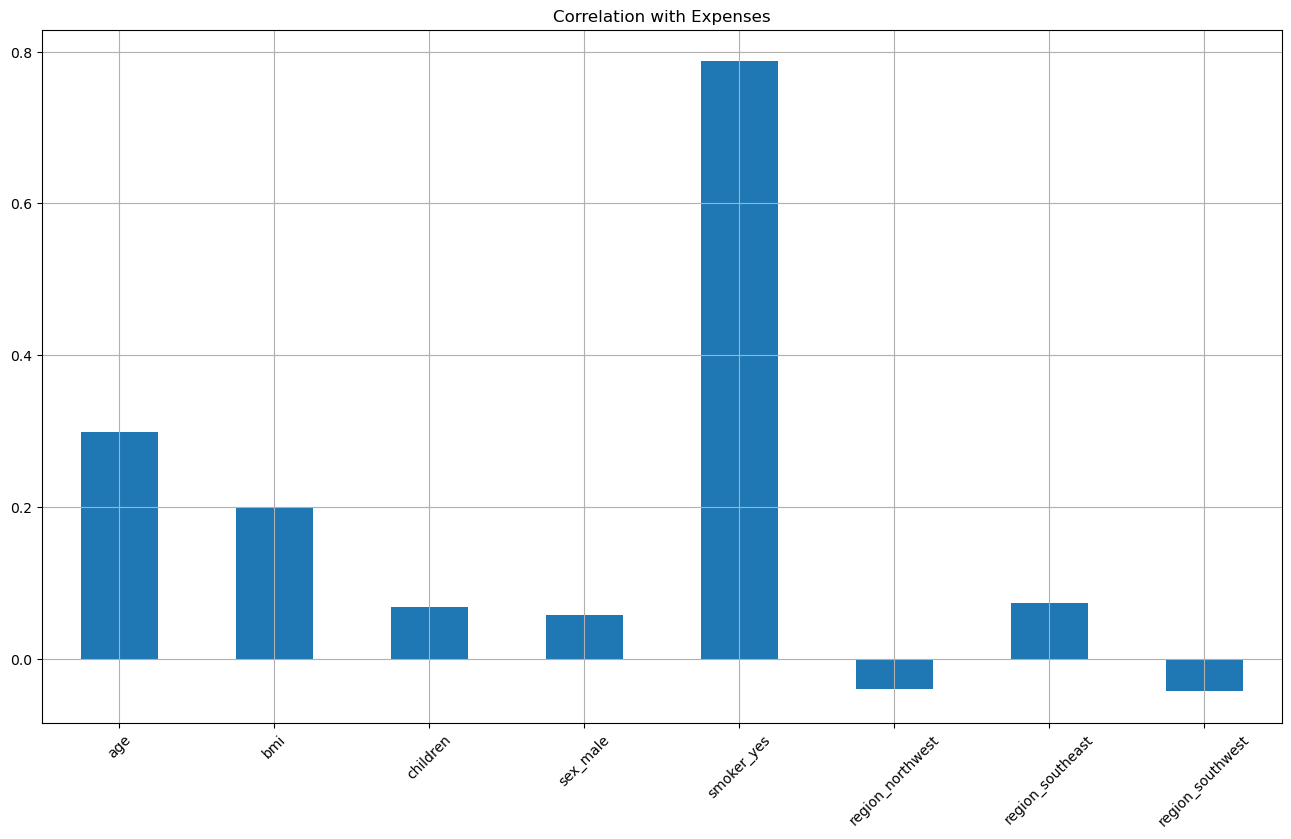

In [70]:
dataset_2.corrwith(dataset['expenses']).plot.bar(
figsize=(16,9), title="Correlation with Expenses", rot=45, grid=True
)

In [71]:
corr = dataset.corr()

<Axes: >

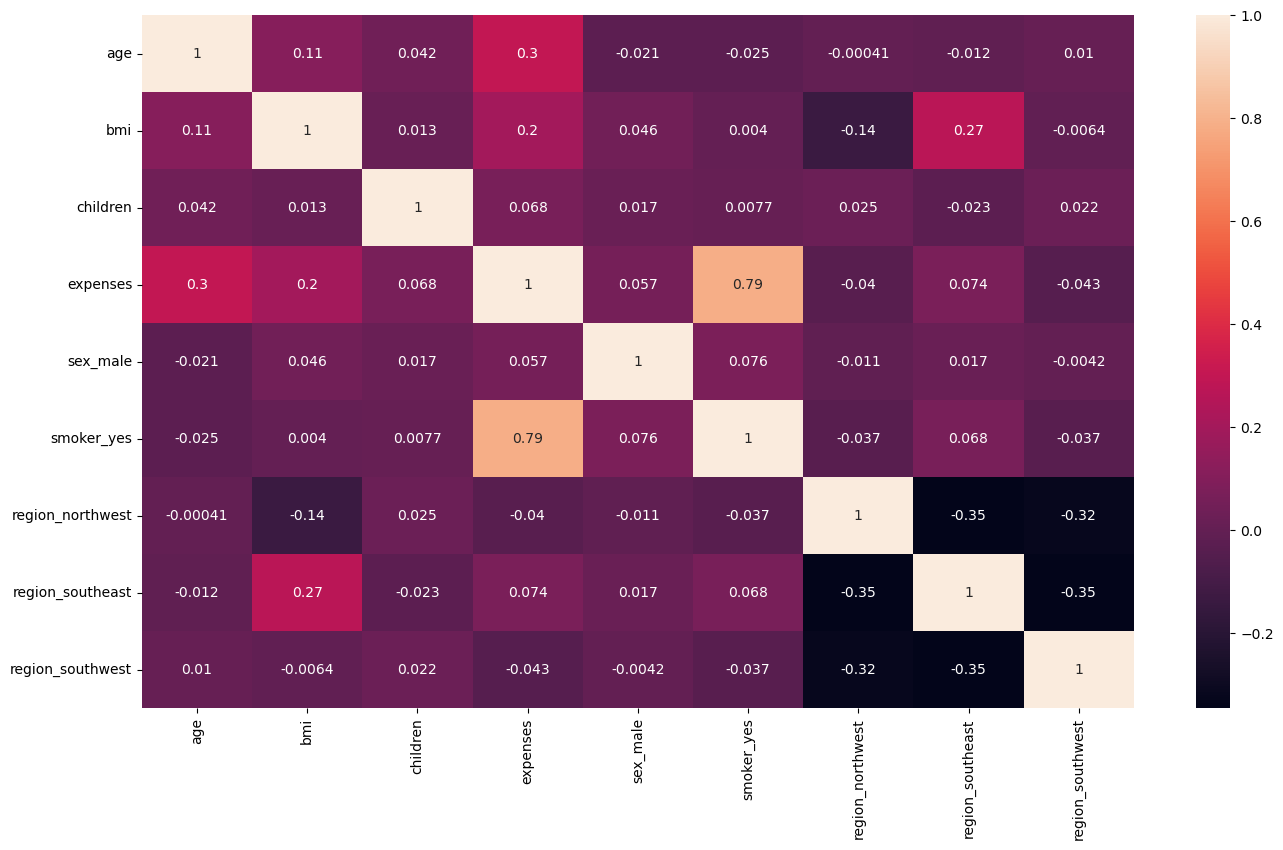

In [74]:
# Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## WE are Splitting the Dataset

In [77]:
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


#### Independent Variables

In [80]:
x = dataset.drop(columns='expenses')

####  Dependent Variable

In [83]:
y = dataset['expenses']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

In [87]:
x_train.shape

(1070, 8)

In [89]:
y_train.shape

(1070,)

In [91]:
x_test.shape

(268, 8)

In [93]:
y_test.shape

(268,)

## We are Scaling the Feature 

In [96]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [98]:
x_train

array([[-0.14853305,  0.54493962,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59345325, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96539113,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91046946, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77133659, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97776946, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [100]:
x_test

array([[ 0.91668389, -0.08573765, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21510735, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.5960684 ,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54755476, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.35350022,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.9589831 ,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part 2: Building the Model

## 1) Multiple Linear Regression

In [104]:
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [106]:
y_pred_lr = regressor_lr.predict(x_test)

In [108]:
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R2 Score: 0.8000184017333828


## 2) Random Forest Regression

In [111]:
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [112]:
y_pred_rf = regressor_rf.predict(x_test)

In [115]:
print("Random Forest Regression R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Regression R2 Score: 0.8804900654772776


## 3) XGBoost Regression

In [118]:
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [120]:
y_pred_xgb = regressor_xgb.predict(x_test)

In [122]:
print("XGBoost Regression R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost Regression R2 Score: 0.8874763826097644


## Logistic Regression (Binary Classification)



In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Creating a binary target variable

In [128]:
median_expenses = dataset['expenses'].median()
dataset['high_spender'] = (dataset['expenses'] > median_expenses).astype(int)

### Define features and binary target

In [131]:
x_binary = dataset.drop(columns=['expenses', 'high_spender'])
y_binary = dataset['high_spender']

### Split data

In [134]:
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(
    x_binary, y_binary, test_size=0.2, random_state=0)

#### Scale features

In [137]:
x_train_binary = sc.fit_transform(x_train_binary)
x_test_binary = sc.transform(x_test_binary)

#### Train Logistic Regression model

In [140]:
log_reg = LogisticRegression()
log_reg.fit(x_train_binary, y_train_binary)

LogisticRegression()

#### Evaluate Logistic Regression

In [143]:
y_pred_binary = log_reg.predict(x_test_binary)
print("Logistic Regression Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report:\n", classification_report(y_test_binary, y_pred_binary))

Logistic Regression Accuracy: 0.9291044776119403
Confusion Matrix:
 [[129   9]
 [ 10 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       138
           1       0.93      0.92      0.93       130

    accuracy                           0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268



# Part 3: Predict Expenses for New Customer

## Customer 1

Name: Alex, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast

In [148]:
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,high_spender
0,19,27.9,0,16884.92,False,True,False,False,True,1
1,18,33.8,1,1725.55,True,False,False,True,False,0
2,28,33.0,3,4449.46,True,False,False,True,False,0
3,33,22.7,0,21984.47,True,False,True,False,False,1
4,32,28.9,0,3866.86,True,False,True,False,False,0


In [150]:
alex_obs = [[40, 45.5, 4, 1, 1, 0, 0, 0,]]

In [152]:
print("Alex's premium expenses prediction (XGBoost):", regressor_xgb.predict(sc.transform(alex_obs)))

Alex's premium expenses prediction (XGBoost): [44099.48]


In [154]:
print("Alex is a high spender (1=Yes, 0=No):", log_reg.predict(sc.transform(alex_obs))[0])

Alex is a high spender (1=Yes, 0=No): 1


## Customer 2

Name: Cindy, age:19, bmi:27.9, children:0, sex:female, smoker:no, region: northwest

In [158]:
cindy_obs = [[19, 27, 0, 0, 0, 1, 0, 0]]

In [160]:
print("Cindy's charges prediction (XGBoost):", regressor_xgb.predict(sc.transform(cindy_obs)))

Cindy's charges prediction (XGBoost): [2351.8674]


In [162]:
print("Cindy is a high spender (1=Yes, 0=No):", log_reg.predict(sc.transform(cindy_obs))[0])

Cindy is a high spender (1=Yes, 0=No): 0


## Customer 3

In [187]:
trump_obs = [[20, 1, 1, 1, 1, 0, 0, 0]]

In [189]:
print("Trump's medical insurance premium expense prediction (XGBoost):", regressor_xgb.predict(sc.transform(trump_obs)))

Trump's medical insurance premium expense prediction (XGBoost): [16441.217]


In [191]:
print("trump is a high spender (1=Yes, 0=No):", log_reg.predict(sc.transform(trump_obs))[0])

trump is a high spender (1=Yes, 0=No): 1


In [ ]:
def predict_expenses():
    # Input customer features
    age = float(input("Enter age: "))
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children/dependents: "))
    sex_male = int(input("Enter sex (1 for male, 0 for female): "))
    smoker_yes = int(input("Enter smoker status (1 for yes, 0 for no): "))
    #region_northeast = int(input("Enter region (1 for northeast, 0 for others): "))
    region_northwest = int(input("Enter region (1 for northwest, 0 for others): "))
    region_southeast = int(input("Enter region (1 for southeast, 0 for others): "))
    region_southwest = int(input("Enter region (1 for southwest, 0 for others): "))
    
    # Prepare input for prediction
    customer_data = np.array([[age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest]])
    
    # Scale the input data
    customer_data_scaled = sc.transform(customer_data)
    
    # Predict the expense
    predicted_expense = regressor_xgb.predict(customer_data_scaled)
    
    print(f"Predicted expense for the customer: ${predicted_expense[0]:.2f}")

# Call the prediction function
predict_expenses()